## Importing the required Libraries.

In [1]:
# Importing the required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys

import os, scipy, sklearn

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection, sklearn.tree, sklearn.linear_model, sklearn.cluster, sklearn.ensemble

In [2]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
df = pd.read_csv('indian_liver_patient.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
print(df.columns)
print('*'*50)
for i in df.columns :
    print(i)
    print(df[i].describe())
    print('*'*50)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
**************************************************
Age
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64
**************************************************
Gender
count      583
unique       2
top       Male
freq       441
Name: Gender, dtype: object
**************************************************
Total_Bilirubin
count    583.000000
mean       3.298799
std        6.209522
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total_Bilirubin, dtype: float64
**************************************************
Direct_Bilirubin
count    583.000000
m

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


So, column "Albumin_and_Globulin_ratio" has some data missing in it.

In [6]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


Let's do some research on the data set and try to understand what each column is telling us. Afterall, we data scientists love stories.

**Column Name**

1. Age - Tells the person's age.
        
        Google - This we all know....duh

2. Gender - (Male or Female) Tells the person's gender. This is a very controversial column as we now know that there can be a spectrum of genders. But here we will only consider two genders.
            
         ME - My sincere apologies to LGBTQIA+ community....I hope in near future we will have a dataset where the spectrum of genders are included.            
         Google - Oh my! you knew that LGBTQ community has now become LGBTQIA+ community...Impressive
         ME - Thank you google.

3. Total_Bilirubin - Well, I'm a mechancial engineer and not a doctor. So obviously I have no clue what this means. Let's ask google baba.

        Google - A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.
        Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down. Your liver takes the bilirubin from your blood and changes its chemical make-up so that most of it is passed through your poop as bile.
        If your bilirubin levels are higher than normal, it’s a sign that either your red blood cells are breaking down at an unusual rate or that your liver isn’t breaking down waste properly and clearing the bilirubin from your blood.Another option is that there’s a problem somewhere along the pathway that gets the bilirubin out of your liver and into your stool. (More information - https://www.webmd.com/a-to-z-guides/bilirubin-test#1)
        
        ME - Thank you Google. So fellows, I think now you have some knowledge on this as I do. And if you knew it already, you are awesome.
        
4. Direct_Bilirubin - It's technically the same as "Total_Bilirubin". The difference will be given us by our own google.
        
        Google - Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct, or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect, or unconjugated, bilirubin. All the bilirubin in your blood together is called total bilirubin. (More information - https://en.wikipedia.org/wiki/Bilirubin#:~:text=Total%20and%20direct%20bilirubin%20levels,direct%20bilirubin%20is%20water%2Dsoluble.)
        
        ME - Damn you google, how much information do you have.....
        
5. Alkaline_Phosphotase - .......

        Google - Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins. The body uses ALP for a wide range of processes, and it plays a particularly important role in liver function and bone development.Using an ALP test, it is possible to measure how much of this enzyme is circulating in a person’s blood.
        (More information - https://www.medicalnewstoday.com/articles/321984#:~:text=Alkaline%20phosphatase%20(ALP)%20is%20an,liver%20function%20and%20bone%20development.)
        
        ME - I knew this....
        Google - No, you don't
        Me - Yeah.....you know everything....
        
6. Alamine_Aminotransferase - First of all it is "Alanine" and not "Alamine" . Rest our friend google will tell.

        Google - Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney. It was originally referred to as serum glutamic pyruvic transaminase (SGPT). Normally, a low level of ALT exists in the serum. ALT is increased with liver damage and is used to screen for and/or monitor liver disease. Alanine aminotransferase (ALT) is usually measured concurrently with AST as part of a liver function panel to determine the source of organ damage. 
        
        ME - So, we need to change the column name to aviod confusion.
        
7. Aspartate_Aminotransferase - Help Google.....

        Google - AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.
        
        ME - WOOAAAHHH.......
        
8. Total_protein - Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body. It's used as part of your routine health checkup. It may also be used if you have unexpected weight loss, fatigue, or the symptoms of a kidney or liver disease.
        
        ME - Atlast, something I knew.        
        Google - You googled it. Don't play smart with me.
        ME - uughhhh........There's no pleasing you.
        
9. Albumin - I think it's related to the protein in our bodies....
            
        Google - Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. It is also carries various substances throughout your body, including hormones, vitamins, and enzymes. Low albumin levels can indicate a problem with your liver or kidneys.(More information - https://medlineplus.gov/lab-tests/albumin-blood-test/#:~:text=Albumin%20is%20a%20protein%20made,with%20your%20liver%20or%20kidneys)
        
        ME - Close enough!!...
        Google - *Face palms*

10. Albumin_and_Globulin_Ratio - This one's pretty eas......

        Google - The Albumin to Globulin ratio (A:G) is the ratio of albumin present in serum in relation to the amount of globulin. The ratio can be interpreted only in light of the total protein concentration. Very generally speaking, the normal ratio in most species approximates 1:1. (More information-https://labtestsonline.org/tests/total-protein-albumin-globulin-ag-ratio)
        
        ME - I give up....
        Google - Who made you a data scientist
        ME - heyyy!! That's mean..
        Google - The Arithmetic Mean is the average of the numbe....
        ME - I know THAT...
        
11. Dataset - This is labelled incorrectly. From my perspective it should be "Liver_Disease" indicating that the patient has liver disease or not 

So, now we have a better understanding of the dataset let's first make the changes that are required to be made

## A Little bit of cleaning is required

In [7]:
# Re-naming the columns
df =  df.rename(columns={'Dataset':'Liver_disease','Alamine_Aminotransferase':'Alanine_Aminotransferase'}, inplace=False)

In [8]:
# Renaming Done
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
# Dropping Null Values
df = df.dropna()
# Changing the values in "Liver_Disease" column 
df['Liver_disease'] = df['Liver_disease'] - 1 
# Converting Gender column into categorical data 
LabelEncoder = sklearn.preprocessing.LabelEncoder()
df['Is_male'] = LabelEncoder.fit_transform(df['Gender'])
df = df.drop(columns='Gender')

In [10]:
X = df[['Age', 'Total_Bilirubin', 
        'Direct_Bilirubin',
        'Alkaline_Phosphotase',
        'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Is_male']]
y = df['Liver_disease']

In [11]:
# Validate each class to understand if the dataset is imbalanced.

print ('Total Unhealthy Livers :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )
print ('Total Healthy Livers :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)) )

Total Unhealthy Livers :  414 and its percentage is 71.5 %
Total Healthy Livers :  165 and its percentage is 28.5 %


In [12]:
df.skew(axis = 0, skipna = True) 

Age                           -0.033591
Total_Bilirubin                4.890768
Direct_Bilirubin               3.199163
Alkaline_Phosphotase           3.753502
Alanine_Aminotransferase       6.527575
Aspartate_Aminotransferase    10.512251
Total_Protiens                -0.292433
Albumin                       -0.048516
Albumin_and_Globulin_Ratio     0.992299
Liver_disease                  0.955179
Is_male                       -1.209212
dtype: float64

#### Here in column name "Liver_disease" **0** *indicate that the the person has some kind of Liver Disease or the liver of the patient is unhealthy* and **1** *represents that the person's liver is healthy.*

Text(0, 0.5, 'Alanine Aminotransferase (units/L)')

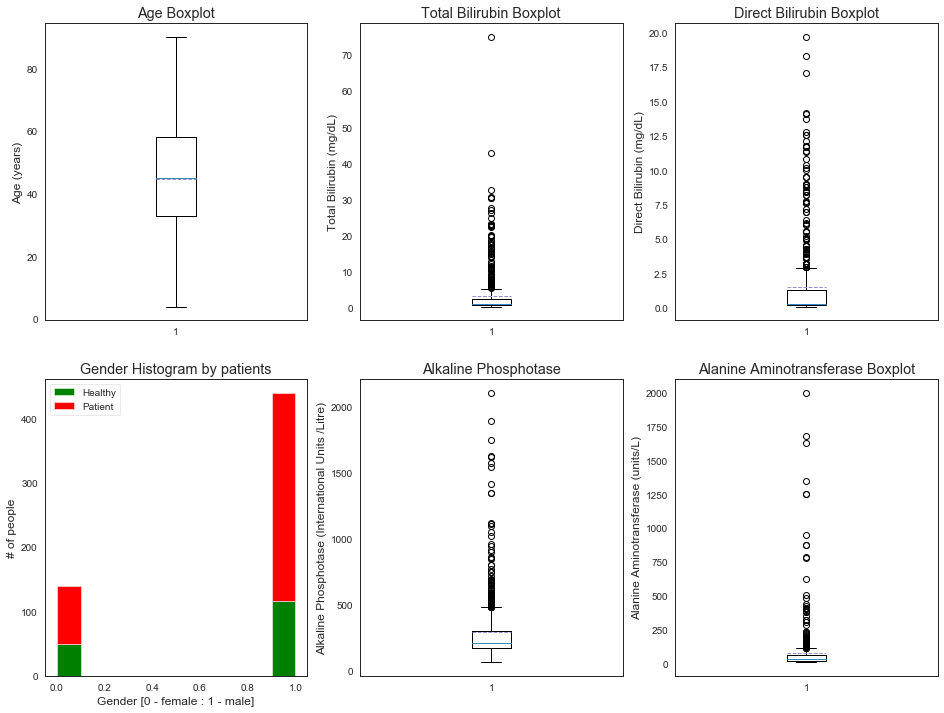

In [13]:
# Plotting the box plots 
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x = X['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (years)')

plt.subplot(232)
plt.boxplot(X['Total_Bilirubin'], showmeans = True, meanline = True)
plt.title('Total Bilirubin Boxplot')
plt.ylabel('Total Bilirubin (mg/dL)')

plt.subplot(233)
plt.boxplot(X['Direct_Bilirubin'], showmeans = True, meanline = True)
plt.title('Direct Bilirubin Boxplot')
plt.ylabel('Direct Bilirubin (mg/dL)')

plt.subplot(234)
plt.hist(x = [X[y==1]['Is_male'], X[y ==0]['Is_male']], 
         stacked=True, color = ['g','r'],label = ['Healthy','Patient'])
plt.title('Gender Histogram by patients')
plt.xlabel('Gender [0 - female : 1 - male]')
plt.ylabel('# of people')
plt.legend()

plt.subplot(235)
plt.boxplot(x = X['Alkaline_Phosphotase'], showmeans = True, meanline = True)
plt.title('Alkaline Phosphotase')
plt.ylabel('Alkaline Phosphotase (International Units /Litre)')

plt.subplot(236)
plt.boxplot(X['Alanine_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase Boxplot')
plt.ylabel('Alanine Aminotransferase (units/L)')

As we can see from Gender histogram Number of Males having liver diseases are way more than the females. Ladies you can relax a little bit. 
        
        ME - Wanna grab a coffee sometime? 
        Google - Coffee is a brewed drink prep....
        ME - I did not ask you!!!

Text(0, 0.5, 'Albumin (g/dL)')

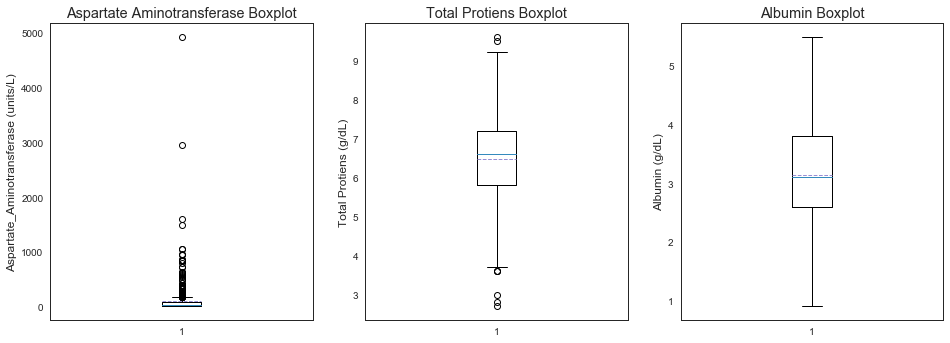

In [14]:
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(X['Aspartate_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Aspartate Aminotransferase Boxplot')
plt.ylabel('Aspartate_Aminotransferase (units/L)')


plt.subplot(232)
plt.boxplot(X['Total_Protiens'], showmeans = True, meanline = True)
plt.title('Total Protiens Boxplot')
plt.ylabel('Total Protiens (g/dL)')

plt.subplot(233)
plt.boxplot(X['Albumin'], showmeans = True, meanline = True)
plt.title('Albumin Boxplot')
plt.ylabel('Albumin (g/dL)')

As we can see, many boxplots tells us that there are many outliers present. But these cannot be ignored as they are still possible. A person can has high levels of Alanine Aminotransferase, this clearly indicates that the person has liver problems.

This will be pretty much clear in the following plots.

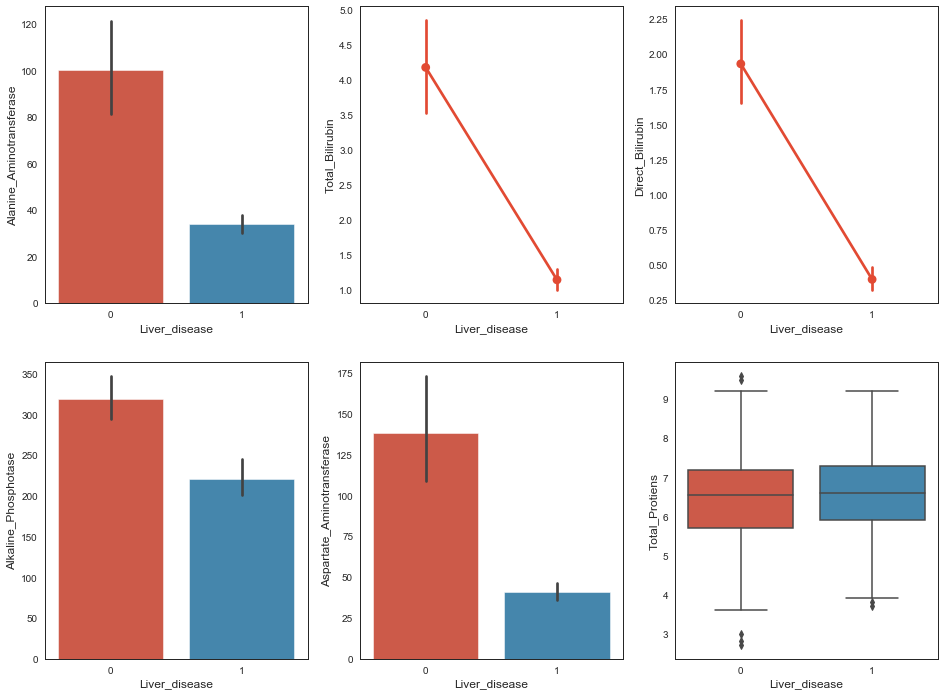

In [15]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(y = 'Alanine_Aminotransferase', x = 'Liver_disease', data=df, ax = saxis[0,0])
sns.pointplot(y = 'Total_Bilirubin', x = 'Liver_disease', data=df, ax = saxis[0,1])
sns.pointplot(y = 'Direct_Bilirubin', x = 'Liver_disease', data=df, ax = saxis[0,2])


sns.barplot(y = 'Alkaline_Phosphotase', x = 'Liver_disease', data=df, ax = saxis[1,0])
sns.barplot(y = 'Aspartate_Aminotransferase', x = 'Liver_disease', data=df, ax = saxis[1,1])
sns.boxplot(y = 'Total_Protiens', x = 'Liver_disease', data=df, ax = saxis[1,2])

As we can see higher the values of individual test, the more risk you have of having one or more liver related diseases. So eat healthy guys!!

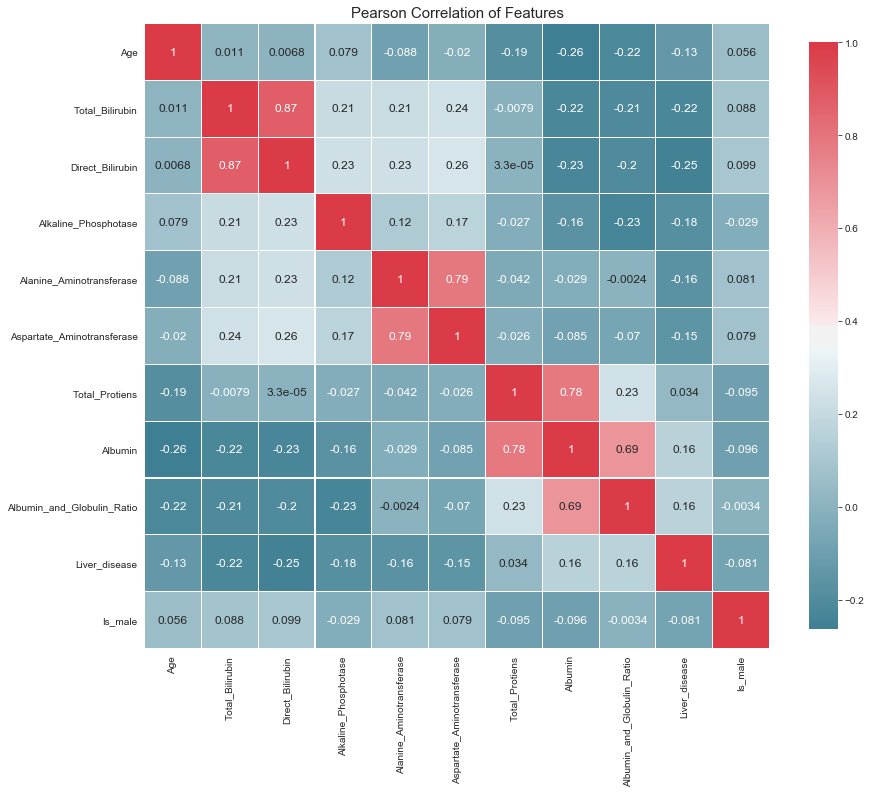

In [16]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

Now seeing all those graphs I'm sure you are pretty bored. Don't worry we will now coming to the most intersting part.

<centre>THE MODELLING!!!!</centre>

No? not interested? You don't want to see how can this dataset can help us? 
If yes, continue to read...

## Model The Data

**Little Note** - When it comes to data modeling, the beginner’s question is always, "what is the best machine learning algorithm?" To this the beginner must learn, the [No Free Lunch Theorem (NFLT)](http://robertmarks.org/Classes/ENGR5358/Papers/NFL_4_Dummies.pdf) of Machine Learning. In short, NFLT states, there is no super algorithm, that works best in all situations, for all datasets. So the best approach is to try multiple MLAs, tune them, and compare them for your specific scenario.

Before Modelling let us split the data into train and test data 

In [17]:
# Splitting the data 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))


Train Shape: (434, 10)
Test Shape: (145, 10)


### Logistic Regression

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [84]:
# Use score method to get accuracy of model
score = lr.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred))

Score of the model is -  0.7034482758620689
Report card of this model - 
              precision    recall  f1-score   support

           0      0.736     0.913     0.815       104
           1      0.438     0.171     0.246        41

    accuracy                          0.703       145
   macro avg      0.587     0.542     0.531       145
weighted avg      0.652     0.703     0.654       145

Accuracy score -  0.7034482758620689


In [90]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.542


Text(0.5, 1, 'Accuracy Score: 0.7034482758620689')

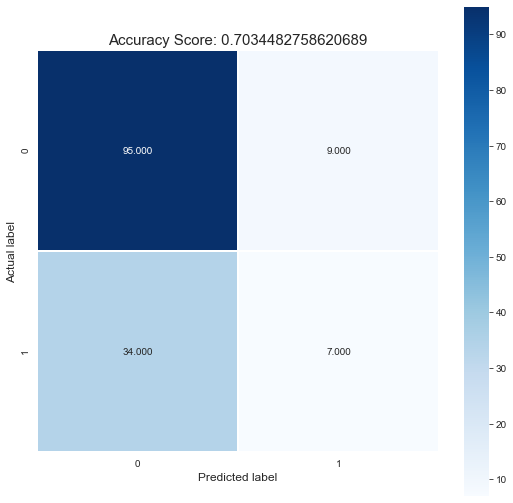

In [20]:
cm1 = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### Naives Bayes Model

In [21]:
# Naives Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [85]:
score = nb.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_nb, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_nb))

Score of the model is -  0.5448275862068965
Report card of this model - 
              precision    recall  f1-score   support

           0      0.952     0.385     0.548       104
           1      0.379     0.951     0.542        41

    accuracy                          0.545       145
   macro avg      0.666     0.668     0.545       145
weighted avg      0.790     0.545     0.546       145

Accuracy score -  0.5448275862068965


In [91]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_nb)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.668


Text(0.5, 1, 'Accuracy Score: 0.5448275862068965')

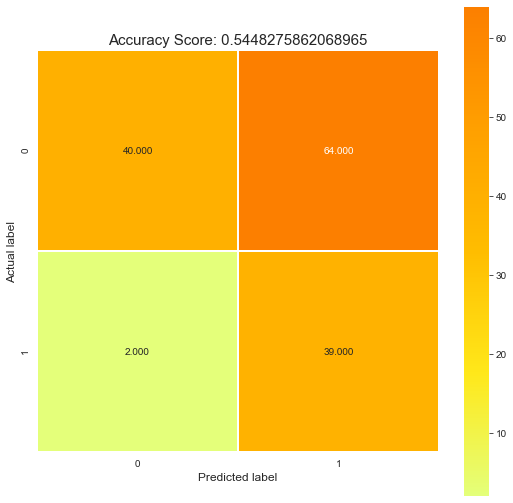

In [23]:
cm2 = metrics.confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### Stochastic Gradient Descent

In [24]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier()
sg.fit(X_train,y_train)
y_pred_sg = sg.predict(X_test)

In [86]:
score = sg.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_sg, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_sg))

Score of the model is -  0.7172413793103448
Report card of this model - 
              precision    recall  f1-score   support

           0      0.717     1.000     0.835       104
           1      0.000     0.000     0.000        41

    accuracy                          0.717       145
   macro avg      0.359     0.500     0.418       145
weighted avg      0.514     0.717     0.599       145

Accuracy score -  0.7172413793103448


In [92]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_sg)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.500


Text(0.5, 1, 'Accuracy Score: 0.7172413793103448')

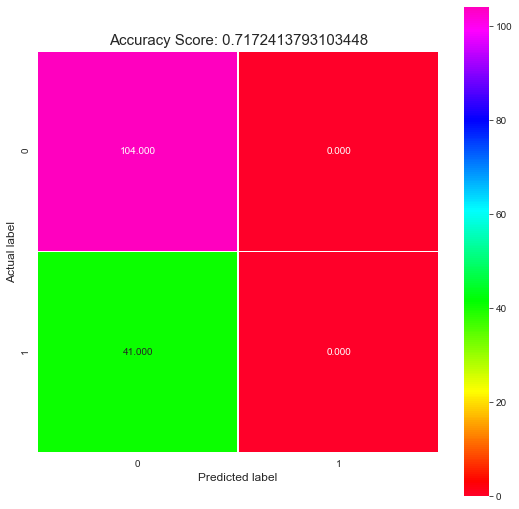

In [26]:
cm3 = metrics.confusion_matrix(y_test, y_pred_sg)
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'gist_rainbow');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

 ### K-Nearest Neighbours

In [27]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [87]:
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.6068965517241379
Report card of this model - 
              precision    recall  f1-score   support

           0      0.701     0.788     0.742       104
           1      0.214     0.146     0.174        41

    accuracy                          0.607       145
   macro avg      0.458     0.467     0.458       145
weighted avg      0.563     0.607     0.581       145

Accuracy score -  0.6068965517241379


In [93]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_knn)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.467


Text(0.5, 1, 'Accuracy Score: 0.6068965517241379')

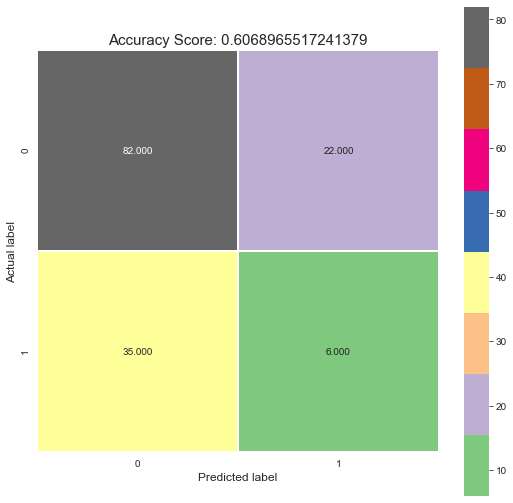

In [29]:
cm4 = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Accent');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10 , random_state = 101, max_features = None, min_samples_leaf =30)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)

In [88]:
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.696551724137931
Report card of this model - 
              precision    recall  f1-score   support

           0      0.750     0.865     0.804       104
           1      0.440     0.268     0.333        41

    accuracy                          0.697       145
   macro avg      0.595     0.567     0.568       145
weighted avg      0.662     0.697     0.671       145

Accuracy score -  0.696551724137931


In [94]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_dtree)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.567


Text(0.5, 1, 'Accuracy Score: 0.696551724137931')

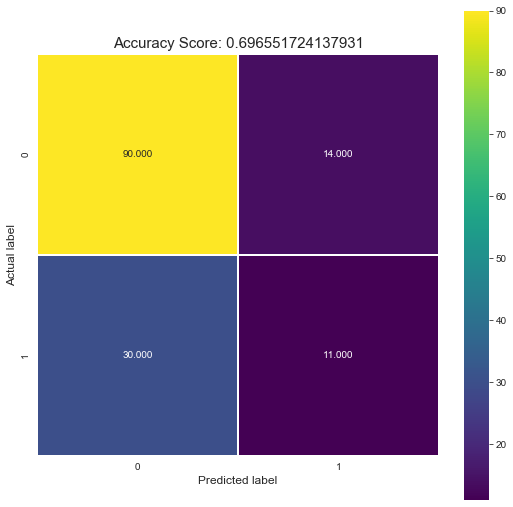

In [57]:
cm5 = metrics.confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(9,9))
sns.heatmap(cm5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [74]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(n_estimators = 80 ,oob_score= True,n_jobs = -1,
                                 random_state = 101, max_features = None, min_samples_leaf = 60)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)

In [89]:
score = ran_for.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_ran, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_ran))

Score of the model is -  0.7310344827586207
Report card of this model - 
              precision    recall  f1-score   support

           0      0.737     0.971     0.838       104
           1      0.625     0.122     0.204        41

    accuracy                          0.731       145
   macro avg      0.681     0.547     0.521       145
weighted avg      0.705     0.731     0.659       145

Accuracy score -  0.7310344827586207


In [95]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_ran)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.547


Text(0.5, 1, 'Accuracy Score: 0.7310344827586207')

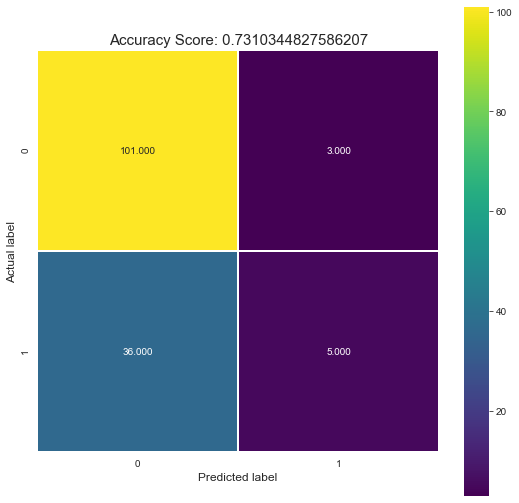

In [76]:
cm6 = metrics.confusion_matrix(y_test, y_pred_ran)
plt.figure(figsize=(9,9))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### Support Vector Machine

In [96]:
# Support Vector machine Model
from sklearn.svm import SVC
svm = SVC(kernel= "linear", C = 0.025, random_state = 101)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [97]:
score = svm.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_svm))

Score of the model is -  0.7172413793103448
Report card of this model - 
              precision    recall  f1-score   support

           0      0.717     1.000     0.835       104
           1      0.000     0.000     0.000        41

    accuracy                          0.717       145
   macro avg      0.359     0.500     0.418       145
weighted avg      0.514     0.717     0.599       145

Accuracy score -  0.7172413793103448


In [98]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_svm)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.500


Text(0.5, 1, 'Accuracy Score: 0.7172413793103448')

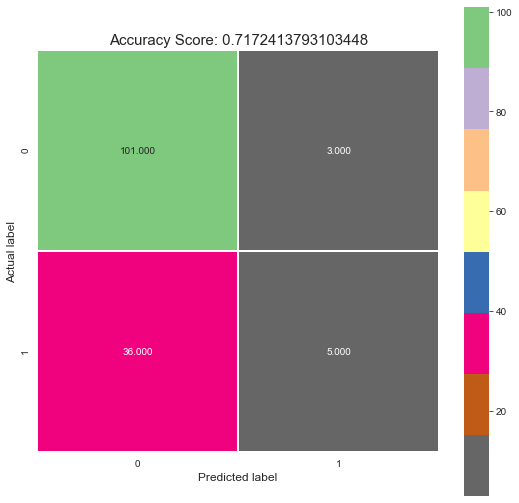

In [100]:
cm7 = metrics.confusion_matrix(y_test, y_pred_ran)
plt.figure(figsize=(9,9))
sns.heatmap(cm7, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Accent_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)